# Gradient plot w/ cartopy


In [18]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors, colorbar
from pandas import read_csv
import os

In [19]:
grad_file = np.load('./step_0/grad/grad_all.npy').T
grd = np.load('../sourcegrid.npy')
stationlist = read_csv('../stationlist.csv')
source_name = os.path.basename(os.getcwd())


stations_lat = []
stations_lon = []

for i in range(0,np.size(stationlist,0)):
    lat = stationlist.at[i,'lat']
    lon = stationlist.at[i,'lon']
    stations_lat.append(lat)
    stations_lon.append(lon)




Text(0.5,1,'Gradient for Homo_Source_long with 16 stations')

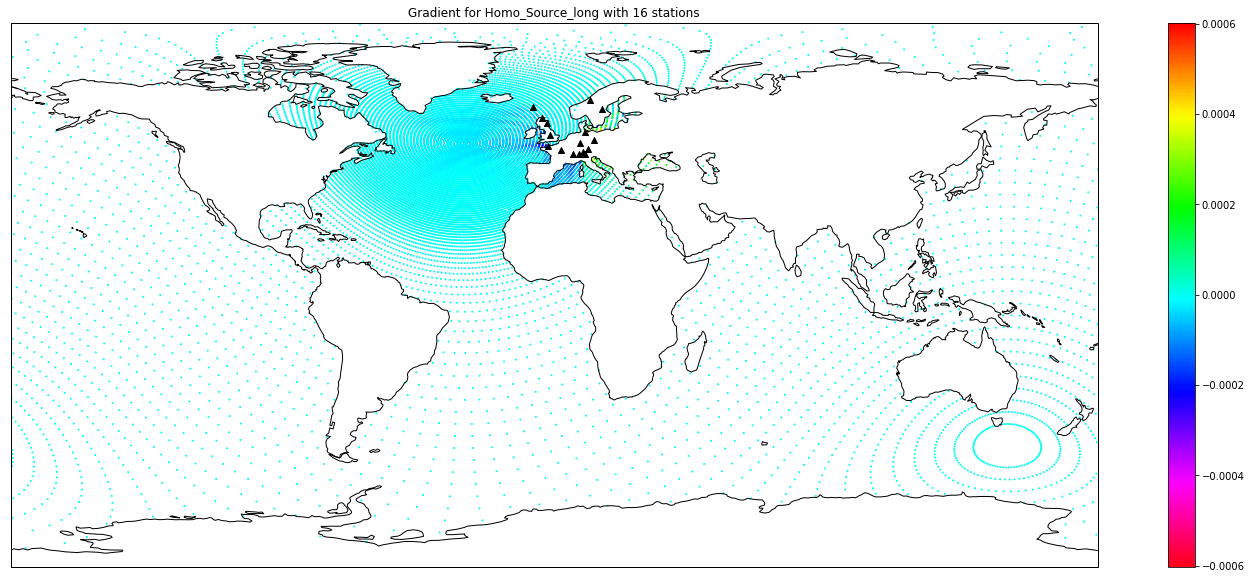

In [24]:
v=np.max(np.abs(grad_file))

plt.figure(figsize=(25,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(grd[0],grd[1],s=1,c=grad_file[:,0],transform=ccrs.Geodetic(),cmap=plt.get_cmap('hsv_r'),norm=colors.Normalize(-v,v))
plt.colorbar()
plt.scatter(stations_lon,stations_lat,c='k',marker='^')
plt.title('Gradient for {} with {} stations'.format(source_name,np.size(stations_lat)))